# Numerical integration and differentiation

## Part 1 Numerical Integration of Gumbel distribution 


Variations in stochastic parameter values can be defined by means of a distribution function, or Probability Density Function (PDF). A PDF describes the probability that a parameter has a certain value x. The most well-known PDFs are the Uniform distribution and the Normal (or Gaussian) distribution, which are both symmetric around the mean. More information about distribution functions and their use will be treated later in MUDE. Here, we will just use it as a mathematical function demonstrating numerical integration.

Besides the PDF, there is the Cumulative Distribution Function (CDF), which describes the probability that a parameter value is lower than a given value of x; it is the integral of the PDF up to x, for all possible x-values.

Gumbel is another distribution, which is non-symmetric. The Gumbel PDF is given by the following function:

$$ f(x) = e^{-(x+e^{-x})} $$

The Gumbel CDF can be obtained by analytical integration, and is defined as:

$$ F\left( x \right) = \int\limits_{ - \infty }^x {f\left( x \right)dx = {e^{ - {e^{ - x}}}}}  $$



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.1:}$
    
Run the cells below to define and visualise the two functions:

</p>
</div>

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import numpy as np

In [2]:
def f(x):
    return np.exp(-(x + np.exp(-x)))


def F(x):
    return np.exp(-np.exp(-x))

[0.36787944 0.87342302 0.98185107]


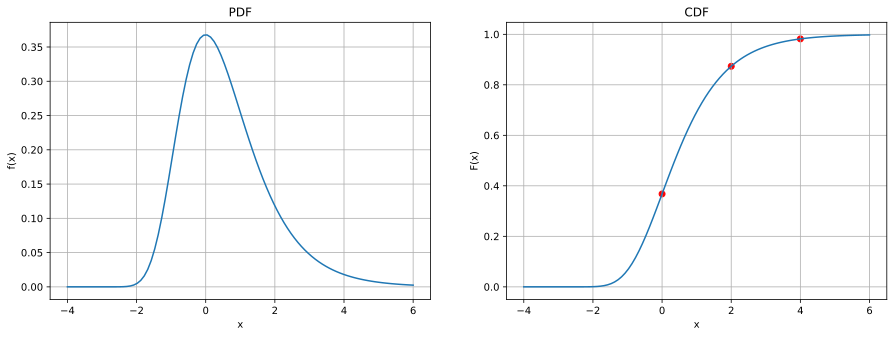

In [3]:
x = np.linspace(-4, 6, num=100)
y = f(x)
Y = F(x)

x_target = np.array([0, 2, 4])
Y_target = F(x_target)
print(Y_target)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x, y)
ax[1].plot(x, Y)
ax[1].scatter(x_target, Y_target, color="red")
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("x")
ax[1].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[1].set_ylabel("F(x)")
ax[0].set_title("PDF")
ax[1].set_title("CDF")
plt.show()

The red dots in the CDF represent concrete points (x_target = [0, 2, 4]) where we will evaluate the CDF function value by numerical integration of the PDF.


### Left Riemann integral:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.2:}$
    
Formulate the Left Riemann integral solution and complete the code below:

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Practically, we can start the numerical integration from x=-4 rather than -inf.
</p></div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.2:}$

</p>
Left Riemann integral formulation:

$$Y_{i+1} = \sum_{j=0}^{i} \left[ f(x_j) \cdot dx \right]$$

Note that we can also write this as:

$$Y_{i+1} = Y_i +  \left[ f(x_i) \cdot dx \right]$$

That is, we only add the area of the new rectangle to the total area we already calculated.
This way, we do not need to evaluate the whole sum all over again for each new point.

</div>



<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Note**

We slightly updated the code to make it clearer where the `10.` in the definition of `dx` comes from.
Because we integrate over an interval from -4 to 6, the total length of the interval is ten.
In the previous version, we defined: `dx = 10. / nsteps`



</div>

In [4]:
nsteps = 10
Y1 = np.zeros(nsteps + 1)

x1 = np.linspace(-4, 6, num=nsteps + 1)
interval_length = x1[-1] - x1[0]
dx = interval_length / nsteps

for i in range(nsteps):
    Y1[i + 1] = Y1[i] + f(x1[i]) * dx


def integral_at_targetvalues(
    x1, Y1, x_target
):  # Function to extract target solutions from targeted x-values
    index = [np.where(x1 == val)[0][0] for val in x_target]
    return Y1[index]


print("Left Riemann rule:   ", integral_at_targetvalues(x1, Y1, x_target))
print("Analytical solution: ", integral_at_targetvalues(x1, F(x1), x_target))


Left Riemann rule:    [0.1839404  0.80646622 0.97204018]
Analytical solution:  [0.36787944 0.87342302 0.98185107]


### Right Riemann integral:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.3:}$
    
Formulate the Right Riemann integral solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.3:}$

</p>

Right Riemann integral formulation:
$$Y_{i+1} = \sum_{j=0}^{i} \left[ f(x_{j+1}) \cdot dx \right]$$

Alternatively:

$$Y_{i+1} = Y_i + \left[ f(x_{i+1}) \cdot dx \right]$$

</div>



In [5]:
Y1 = np.zeros(nsteps + 1)

for i in range(nsteps):
    Y1[i + 1] = Y1[i] + f(x1[i + 1]) * dx

print("Right Riemann rule:  ", integral_at_targetvalues(x1, Y1, x_target))
print("Analytical solution: ", integral_at_targetvalues(x1, F(x1), x_target))


Right Riemann rule:   [0.55181984 0.92467117 0.99002341]
Analytical solution:  [0.36787944 0.87342302 0.98185107]


### Midpoint rule:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.4:}$
    
Formulate the Midpoint rule solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.4:}$

</p>

Midpoint rule formulation:
$$Y_{i+1} = \sum_{j=0}^{i} \left[ f \left( \frac{x_j+x_{j+1}}{2} \right) \cdot dx \right] $$

</div>



In [6]:
Y1 = np.zeros(nsteps + 1)

for i in range(nsteps):
    Y1[i + 1] = Y1[i] + f((x1[i] + x1[i + 1]) / 2) * dx

print("Midpoint rule:       ", integral_at_targetvalues(x1, Y1, x_target))
print("Analytical solution: ", integral_at_targetvalues(x1, F(x1), x_target))


Midpoint rule:        [0.3678114  0.87702222 0.98193753]
Analytical solution:  [0.36787944 0.87342302 0.98185107]


### Trapezoidal rule:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.5:}$
    
Formulate the Trapezoidal rule solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.5:}$

</p>
Trapezoidal rule formulation:

$$Y_{i+1} = \sum_{j=0}^{i} \left[ \frac{f(x_j) + f(x_{j+1})}{2} \cdot dx \right] $$

</div>



In [7]:
Y1 = np.zeros(nsteps + 1)

for i in range(nsteps):
    Y1[i + 1] = Y1[i] + (f(x1[i]) + f(x1[i + 1])) / 2 * dx

print("Trapezoidal rule:    ", integral_at_targetvalues(x1, Y1, x_target))
print("Analytical solution: ", integral_at_targetvalues(x1, F(x1), x_target))


Trapezoidal rule:     [0.36788012 0.8655687  0.9810318 ]
Analytical solution:  [0.36787944 0.87342302 0.98185107]


Now, run the code below to plot the entire CDF as obtained from numerical integration of the PDF (Trapezoidal rule), together with the analytical CDF

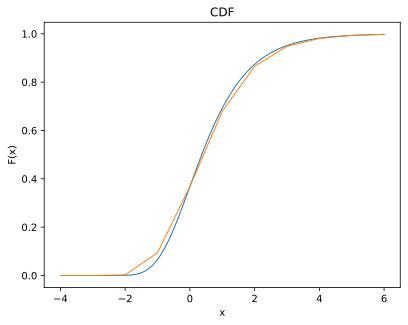

In [8]:
plt.plot(x, Y, linewidth=1)
plt.plot(x1, Y1, linewidth=1)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("CDF")
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.6:}$
    
Play with the number of steps (nsteps) to see how this number changes the accuracy of the numerical solution

</p>
</div>

## Part 2 Numerical Integration and differentiation of earthquake record

In this exercise we will apply numerical integration and numerical differentiation on given measurement data.
The data involves a velocity time series from earthquake recordings. In fact, the original earthquake records also include acceleration and displacement time series, but the purpose of this exercise is to calculate the displacement and acceleration from the given velocity by numerical integration and differentiation, respectively. Afterwards, the results are compared with the original data.

![seismograph](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Kinemetrics_seismograph.jpg/960px-Kinemetrics_seismograph.jpg)

Source: Wikimedia, Yamaguchi先生 (https://commons.wikimedia.org/wiki/File:Kinemetrics_seismograph.jpg), licensed under CC BY SA

Earthquake recordings are relevant as input signals to geotechnical and structural analysis to back-analyse or design structures for the (additional) forces and deformations that may occur during earthquakes. In a so-called one-dimensional site response analysis, geotechnical engineers can also predict whether soil liquefaction might happen at a project location if an earthquake would occur. Based on this they determine if or what measures need to be taken to improve the ground conditions.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$
    
Open the file [`Earthquake_velocity.txt`](https://github.com/TUDelft-MUDE/source-files/raw/main/file/Earthquake_velocity.txt) in a text editor (like VS code) to see how the content looks like.

</p>
</div>

The file contains velocities that were recorded at a frequency of 200 per second during the event of an earthquake. Hence, the total duration of the earthquake measurements (in seconds) is the total number of readings divided by 200.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$
    
Run the code below to download the datafiles

</p>
</div>

In [9]:
import os
from urllib.request import urlretrieve

In [10]:
data_files = [
    "Earthquake_velocity.txt",
    "Earthquake_acceleration.txt",
    "Earthquake_displacement.txt",
]

for filename in data_files:
    if not os.path.isfile(filename):
        print(f"Downloading {filename}...")
        urlretrieve("https://github.com/TUDelft-MUDE/source-files/raw/main/file/" + filename, filename)

In [11]:
f = open("Earthquake_velocity.txt", "r")
v = np.array([])

while True:
    line = f.readline()
    if not line:  # If line is empty, we've reached the end of file
        break

    try:
        # Use split() to split on whitespace and filter out empty strings
        string_values = line.split()
        if len(string_values) > 1:  # to skip the first couple of lines with text
            # Convert to float array
            values = np.array([float(x) for x in string_values])
            v = np.append(v, values)
    except ValueError:
        # Skip lines that can't be parsed as numbers
        continue

f.close()  # Close the file
num = len(v)
t_end = (num - 1) / 200
t = np.linspace(
    start=0,
    stop=t_end,
    num=num,
)

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Note**

We slightly changed the definition of `t` compared to the assignment version.
The last time point is now at `(num - 1) / 200` instead of `num / 200`.
This was necessary to ensure that the frequency of measurements is indeed exactly 200 per second, as explained in the text above.

</div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.3:}$
    
Run the code below to plot the velocity time series

</p>
</div>

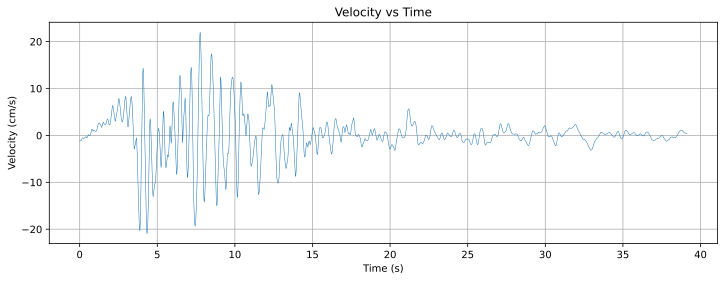

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(t, v, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (cm/s)")
plt.title("Velocity vs Time")
plt.grid(True)
plt.show()

### Displacement

First, we will integrate the velocity to displacement, to see what the maximum displacement is at the measurement point and how much permanent deformation it has undergone. Thereby we will use three numerical integration methods: Left Riemann, Right Riemann and Trapezoidal rule. At the end of this block, we will compare the results from the various methods with each other and with the displacement from the earthquake record.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.4:}$
    
Formulate the Left Riemann integral solution and complete the code below, using the velocity data (v) at corresponding times (t):

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.4:}$

</p>

Left Riemann integral formulation:
$$d_{i+1} = d_{i} + \left( t_{i+1} - t_{i} \right) \cdot v_{i} $$

</div>



In [13]:
d_LR = np.zeros([num])

for i in range(0, num - 1):
    d_LR[i + 1] = d_LR[i] + (t[i + 1] - t[i]) * v[i]

Plot the displacement

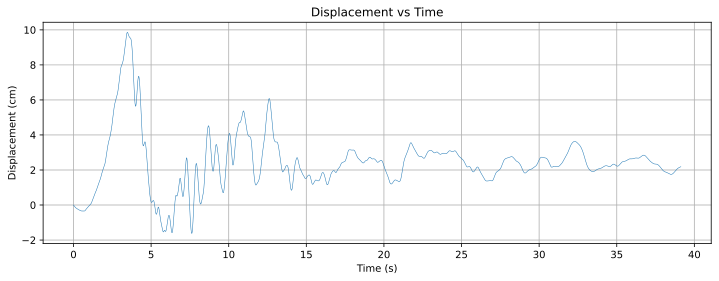

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_LR, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (cm)")
plt.title("Displacement vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.5:}$
    
Formulate the Right Riemann integral solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.5:}$

</p>

Right Riemann integral formulation:

$$d_{i} = d_{i-1} + \left( t_{i} - t_{i-1} \right) \cdot v_{i} $$

or

$$d_{i+1} = d_{i} + \left( t_{i+1} - t_{i} \right) \cdot v_{i+1} $$

</div>



In [15]:
d_RR = np.zeros([num])

for i in range(1, num):
    d_RR[i] = d_RR[i - 1] + (t[i] - t[i - 1]) * v[i]

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

Note that the values that `i` takes in this loop are different from the range of values it takes in task 2.4.
An alternative and equivalent way to implement the code that uses the same range of values for `i` as in task 2.4 is shown below.

</div>



In [16]:
d_RR = np.zeros([num])

for i in range(0, num - 1):
    d_RR[i + 1] = d_RR[i] + (t[i + 1] - t[i]) * v[i + 1]

Plot the displacement

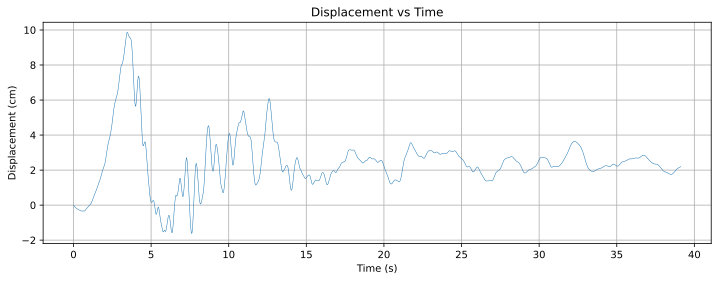

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_RR, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (cm)")
plt.title("Displacement vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.6:}$
    
Formulate the Trapezoidal rule solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.6:}$

</p>

Trapezoidal rule formulation:

$$d_{i+1} = d_{i} + \left( t_{i+1} - t_{i} \right) \cdot \left( \frac{v_{i+1} + v_{i}}{2} \right) $$

</div>



In [18]:
d_TR = np.zeros([num])

for i in range(0, num - 1):
    d_TR[i + 1] = d_TR[i] + (t[i + 1] - t[i]) * (v[i + 1] + v[i]) / 2

Note that in this case, where data is given only at specific time intervals, it is not possible to apply the Midpoint rule, since we only have data at the given points in time, and not in the middle between two successive points.

Plotting all together

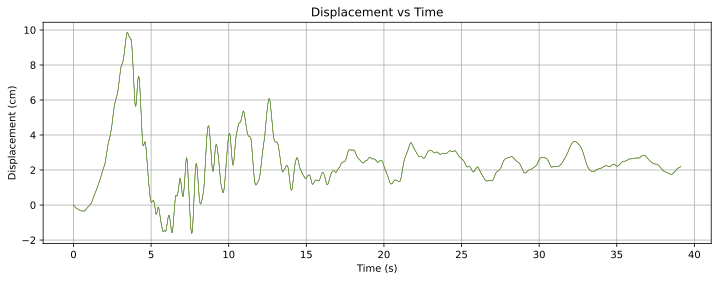

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_LR, linewidth=0.5)
plt.plot(t, d_RR, linewidth=0.5)
plt.plot(t, d_TR, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (cm)")
plt.title("Displacement vs Time")
plt.grid(True)
plt.show()

Since the measurements have a rather high sampling frequency, the results seem quite accurate and the differences between the integration methods are minimal in this case.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.7:}$
    
Open the 'Earthquake_displacement.txt' file and store the displacement data in a one-dimensional array (d_orig). Compare the calculated displacements with original displacement data.

Conclude on the accuracy of your solution.

</p>
</div>

In [20]:
f = open("Earthquake_displacement.txt", "r")
d_orig = np.array([])

while True:
    line = f.readline()
    if not line:  # If line is empty, we've reached the end of file
        break

    try:
        # Use split() to split on whitespace and filter out empty strings
        string_values = line.split()
        if len(string_values) > 1:  # to skip the first couple of lines with text
            # Convert to float array
            values = np.array([float(x) for x in string_values])
            d_orig = np.append(d_orig, values)
    except ValueError:
        # Skip lines that can't be parsed as numbers
        continue

f.close()  # Close the file

2.1870900000000106 2.194995000000023 2.1910425000000084 2.188


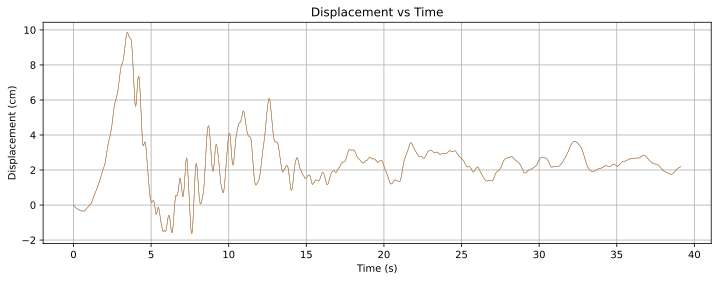

In [21]:
print(d_LR[-1], d_RR[-1], d_TR[-1], d_orig[-1])
plt.figure(figsize=(12, 4))
plt.plot(t, d_TR, linewidth=0.5)
plt.plot(t, d_orig, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (cm)")
plt.title("Displacement vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.7:}$

</p>
Since the measurements have a rather high sampling frequency, the results seem quite accurate and the differences between the integration methods are minimal in this case.
</div>



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.8:}$
    
Conclude on the maximum displacement and the permanent displacement (although the measurement point has not yet come to a complete rest). You may answer in [cm] and round off to integer values (zero decimals).

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.8:}$

</p>
The maximum displacement is 10 cm; the permanent displacement is 2 cm
</div>



### Acceleration

Next, we will differentiate the velocity to acceleration, to see what the maximum acceleration is at the measurement point. Thereby we will use three numerical differentiation methods: Forward difference, Backward difference and Central difference. At the end of this block, we will compare our results with each other and with the acceleration from the earthquake record.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.9:}$
    
Formulate the solution according to the Forward Difference method and complete the code below

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.9:}$

</p>
Forward Difference formulation:

$$df_{i} = \frac{v_{i+1} - v_{i}} {t_{i+1} - t_{i}}$$

</div>



In [22]:
df_FD = np.zeros([num])

for i in range(0, num - 1):
    df_FD[i] = (v[i + 1] - v[i]) / (t[i + 1] - t[i])

Plot the acceleration

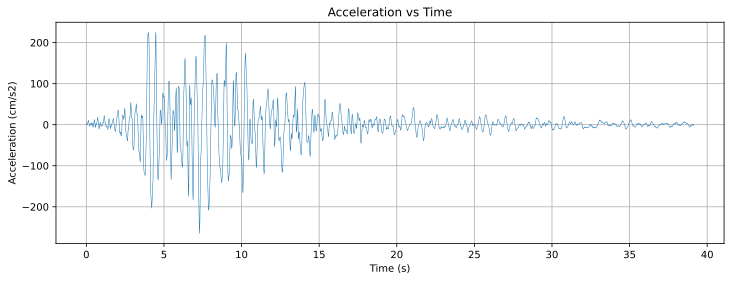

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_FD, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s2)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.10:}$
    
Formulate the solution according to the Backward Difference method and complete the code below

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.10:}$

</p>
Backward Difference formulation:

$$df_{i} = \frac{v_{i} - v_{i-1}} {t_{i} - t_{i-1}}$$

</div>



In [24]:
df_BD = np.zeros([num])

for i in range(1, num):
    df_BD[i] = (v[i] - v[i - 1]) / (t[i] - t[i - 1])

Plot the acceleration

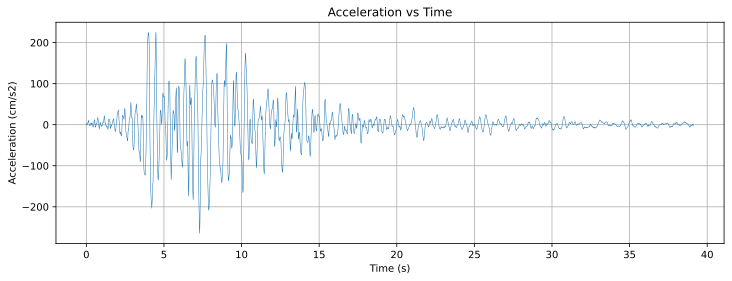

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_BD, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s2)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.11:}$
    
Formulate the solution according to the Central Difference method and complete the code below

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.11:}$

</p>
Central Difference formulation:

$$df_{i} = \frac{v_{i+1} - v_{i-1}} {t_{i+1} - t_{i-1}}$$

</div>



In [26]:
df_CD = np.zeros([num])

for i in range(1, num - 1):
    df_CD[i] = (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])

Plotting all together:

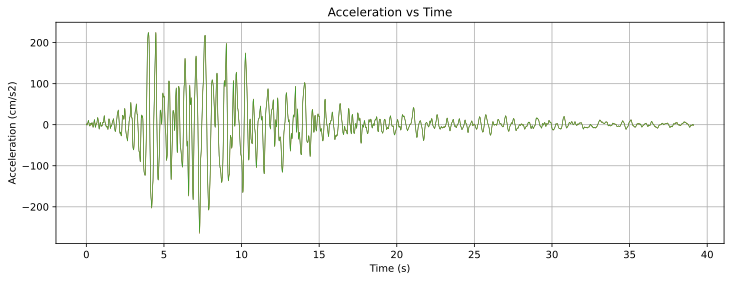

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_FD, linewidth=0.5)
plt.plot(t, df_BD, linewidth=0.5)
plt.plot(t, df_CD, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s2)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

Again, the results seem quite accurate and the differences between the differentiation methods are minimal in this case, although the final values are notably different.

</div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.12:}$
    
Run the code below to open the 'Earthquake_acceleration.txt' file and store the acceleration data in a one-dimensional array (a_orig). Compare the calculated acceleration with original acceleration data.

Conclude on the accuracy of your solution.

</p>
</div>

In [28]:
f = open("Earthquake_acceleration.txt", "r")
a_orig = np.array([])

while True:
    line = f.readline()
    if not line:  # If line is empty, we've reached the end of file
        break

    try:
        # Use split() to split on whitespace and filter out empty strings
        string_values = line.split()
        if len(string_values) > 1:  # to skip the first couple of lines with text
            # Convert to float array
            values = np.array([float(x) for x in string_values])
            a_orig = np.append(a_orig, values)
    except ValueError:
        # Skip lines that can't be parsed as numbers
        continue

f.close()  # Close the file

0.0 -1.1999999999993871 0.0 -0.99
-1.1999999999993871 -0.9999999999994893 -1.0999999999994383 -1.26


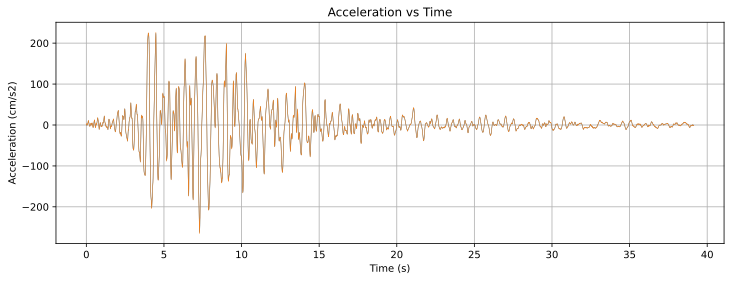

In [29]:
print(df_FD[-1], df_BD[-1], df_CD[-1], a_orig[-1])
print(df_FD[-2], df_BD[-2], df_CD[-2], a_orig[-2])
plt.figure(figsize=(12, 4))
plt.plot(t, df_CD, linewidth=0.5)
plt.plot(t, a_orig, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s2)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.12:}$

</p>
Again, the results seem quite accurate and the differences between the differentiation methods are minimal in this case, although the final values are notably different.

Also note that not all finite difference formulas can be applied at the first and last time steps. For instance, with the forward and central difference methods, the acceleration at the final step is zero. In our implementation of these methods, the loop never fills the last entry of the array because it would require a velocity measurement after the last available one (`v[i + 1]` in the central difference code).
</div>



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.13:}$
    
Conclude on the maximum acceleration that the measurement point has undergone. You may round off to multitudes of 1 m/s² (0.1 G).

What time interval do you consider the 'heaviest' part of the earthquake?

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.13:}$

</p>
The maximum acceleration is over 2 m/s² (0.2 G). The heaviest part of the earthquake is in the time interval between 3 and 14 seconds.
</div>



> By Ronald Brinkgreve and Anna Störiko, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).